# Exploring ergodicity

Exploration of the topic of ergodicity was spurred while reading Nassim Nicholas Taleb's book *Fooled by Randomness*.

In the book, Taleb gives the following rough (by his own description) explanation of ergodicity: *..."(under certain conditions) very long sample paths would end up resembling each other.  The properties of a very, very long sample path would be similar to the Monte Carlo properties of an average of shorter ones."*

We have posed to ourselves the following question:

Suppose you are to bet under the following conditions: if you win, your bet increases by 5%, but if you lose, your bet decreases by 3%.  The probability of winning is 1/2.

Over a long run (say, 1,000 bets) do you expect to come out a winner or a loser?  You might think that we should expect to come out ahead, since the probability of winning is the same as the probability of losing, and when we win our bet increases by more than it decreases if we lose.  However, let's explore it!

## Let's explore a random series of 1,000 trials matching our betting system

We create a run of 1,000 trials where each trial represents a Bernoulli random variable with probability 1/2.
We start with an initial bet of $1, and then add 5% if the we won (Bernoulli r.v. = 1) or subtract 3% if we lost (Bernoulli r.v. = 0). We repeat for 1,000 bets and then plot the result. 


In [31]:
import numpy as np

n, p = 1, 0.5
num_trials = 1000

outcomes = np.random.binomial(n, p, num_trials)

print("The number of bets we will make is {}".format(len(outcomes)))
print("The total number of wins is {}".format(sum(outcomes)))


The number of bets we will make is 1000
The total number of wins is 514


In [32]:
bet = 1 
bet_trajectory = []

for n in outcomes:
    if n == 1:
        bet = bet * 1.05
    else:
        bet = bet * 0.97
    bet_trajectory.append(bet)
    
print("Number of bets made is {}".format(len(bet_trajectory)))
print("Min amount is {0} and max amount is {1}".format(min(bet_trajectory), max(bet_trajectory)))

Number of bets made is 1000
Min amount is 0.9409 and max amount is 31002.20175823524


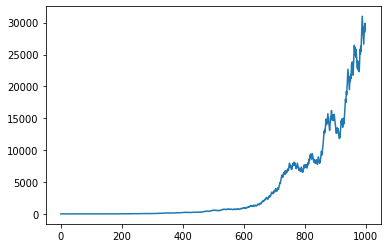

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(1000), bet_trajectory)
plt.show()

## 1,000 trials of 1,000 bets

Now for fun, we repeat this process 1,000 times and plot the final amount after each time.

In [4]:
def betting_spree(bet, num_trials):
    """ Takes a starting bet and a number of bets to make, and outputs
        the final amount where 1 (win) = 5% gain, 0 (lose) = 3% loss
    
    Params:
    ----
    bet: String
        Your starting bet amount (e.g. 1, to bet $1)
    num_trials: Int
        A number of times to bet
    
    Returns: 
    ----
    result: Int
        The final amount you win/lose
    
    """
    import numpy as np
    outcomes = np.random.binomial(1, 0.5, num_trials)
    
    for n in outcomes:
        if n == 1:
            bet = bet * 1.05
        else:
            bet = bet * 0.97
    return(bet)

stored_trials = [betting_spree(1, 1000) for x in range(1000)] 

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9y_8xod5 because the default path (/home/ick4/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


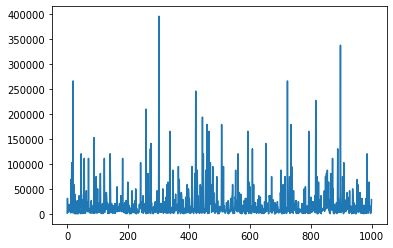

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1000), stored_trials)
plt.show()

## Now let's explore the effects of a non-random series of outcomes

First we'll put the code from Part I in a function, so we can re-use it easily.
Then we will run it on two different betting trajectories: 
* A streak of 500 wins, followed by 500 losses
* A streak of 500 losses, followed by 500 wins

In [14]:
def betting_trajectory(bet, outcomes):
    """ Takes a starting bet and a listof 0/1 (lose/win) outcomes, and outputs
        the trajectory of outcomes where 1 (win) = 5% gain, 0 (lose) = 3% loss
    
    Params:
    ----
    bet: String
        Your starting bet amount (e.g. 1, to bet $1)
    outcomes: List
        A list of 0/1 outcomes, length = # bets to run
    
    Returns: 
    ----
    bet_trajectory: List
        List of the outcomes of each bet, length = # bets run
    
    """
    import numpy as np
    
    bet_trajectory = []
    
    for n in outcomes:
        if n == 1:
            bet = bet * 1.05
        else:
            bet = bet * 0.97
        bet_trajectory.append(bet)
        
    return(bet_trajectory)

In [17]:
import numpy as np 

winning_streak_first = [1]*500 + [0]*500 
losing_streak_first = [0]*500 + [1]*500

win_first = betting_trajectory(1, winning_streak_first)
lose_first = betting_trajectory(1, losing_streak_first)

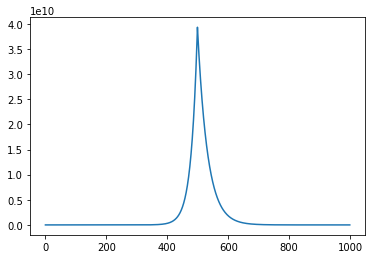

In [18]:
plt.plot(range(1000), win_first)
plt.show()

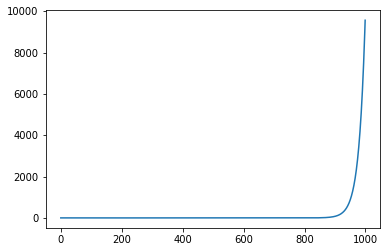

In [19]:
plt.plot(range(1000), lose_first)
plt.show()

## This shit is weird.

In [7]:
# Use this to modify it for a random variable with non-binary outcome possibilities
n, p = 1000, 0.5
num_trials = 10000

outcomes = np.random.choice([0, 1], size=n, p=[p, (1-p)])